## Subject: Evolutionary computing
### Topic: N Queens using backtracking and genetic algorithm

# Aim:
### N-Queen Problem using Evolutionary Computing Concept:


1.	To comprehend N-Queens’ problem


2.	To solve N queens’ problem using any other approach such as hill climbing or back tracking


3.	To solve N queens’ problem using genetic algorithm


4.	To compare your observations for both the approaches

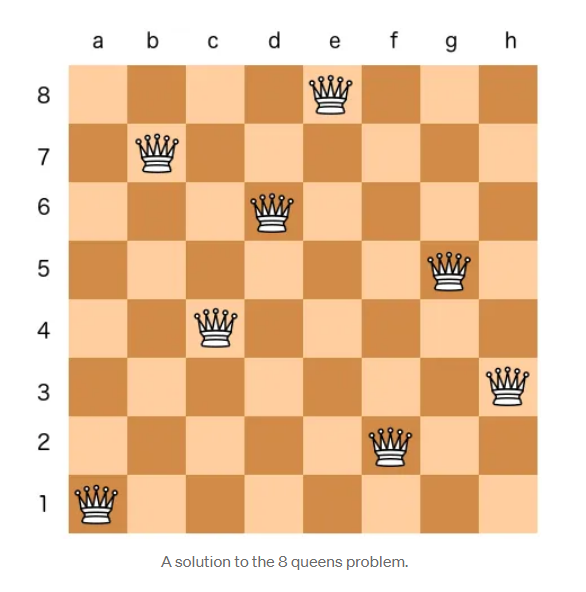

# To comprehend N-Queens' problem

- The N-Queens problem involves placing N chess queens on an N×N chessboard in a way that no two queens threaten each other. 
- The challenge is to find a configuration where queens, representing in each row, column, and diagonal, do not share the same position. It's a classic combinatorial optimization puzzle with applications in algorithm design and artificial intelligence.


# Solving N queens' problem using backtracking

https://medium.com/nerd-for-tech/genetic-algorithm-8-queens-problem-b01730e673fd

In [ ]:
global N
N = 4
def printSolution(board):
    for i in range(N):
        for j in range(N):
            print (board[i][j],end=' ')
        print()

def isSafe(board, row, col):
    for i in range(col):
        if board[row][i] == 1:
            return False
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    for i, j in zip(range(row, N, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    return True

def solveNQUtil(board, col):
    if col >= N:
        return True
    for i in range(N):
        if isSafe(board, i, col):
            board[i][col] = 1
            if solveNQUtil(board, col + 1) == True:
                return True
            board[i][col] = 0
    return False

def solveNQ():
    board = [ [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]
             ]
    if solveNQUtil(board, 0) == False:
        print ("Solution does not exist")
        return False
    printSolution(board)
    return True


In [ ]:
solveNQ()

0 0 1 0 
1 0 0 0 
0 0 0 1 
0 1 0 0 


True

# Solving N queens' problem using genetic algorithm
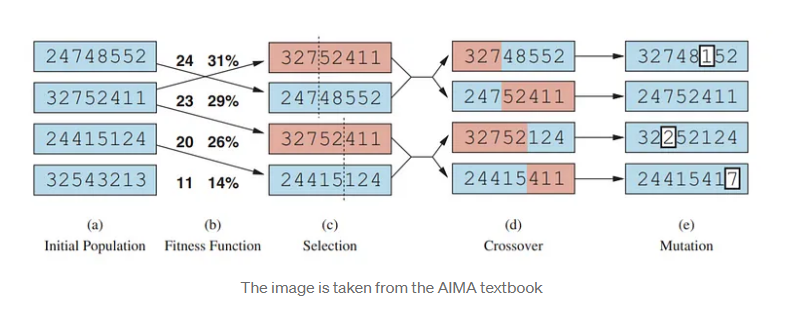

In [6]:
#Constants, experiment parameters
NUM_QUEENS = 8
POPULATION_SIZE = 10
MIXING_NUMBER = 2
MUTATION_RATE = 0.05

In [4]:
def fitness_score(seq):
    score = 0
    
    for row in range(NUM_QUEENS):
        col = seq[row]
        
        for other_row in range(NUM_QUEENS):
            
            #queens cannot pair with itself
            if other_row == row:
                continue
            if seq[other_row] == col:
                continue
            if other_row + seq[other_row] == row + col:
                continue
            if other_row - seq[other_row] == row - col:
                continue
            #score++ if every pair of queens are non-attacking.
            score += 1
    
    #divide by 2 as pairs of queens are commutative
    return score/2

In [7]:
import random
from scipy import special as sc

def selection(population):
    parents = []
    
    for ind in population:
        #select parents with probability proportional to their fitness score
        if random.randrange(sc.comb(NUM_QUEENS, 2)*2) < fitness_score(ind):
            parents.append(ind)
            
    
    return parents

In [5]:
import itertools
def crossover(parents):
    
    #random indexes to to cross states with
    cross_points = random.sample(range(NUM_QUEENS), MIXING_NUMBER - 1)
    offsprings = []
    
    #all permutations of parents
    permutations = list(itertools.permutations(parents, MIXING_NUMBER))
    
    for perm in permutations:
        offspring = []
        
        #track starting index of sublist
        start_pt = 0
        
        for parent_idx, cross_point in enumerate(cross_points):    #doesn't account for last parent
            
            #sublist of parent to be crossed
            parent_part = perm[parent_idx][start_pt:cross_point]
            offspring.append(parent_part)
            
            #update index pointer
            start_pt = cross_point
            
        #last parent
        last_parent = perm[-1]
        parent_part = last_parent[cross_point:]
        offspring.append(parent_part)
        
        #flatten the list since append works kinda differently
        offsprings.append(list(itertools.chain(*offspring)))
    
    return offsprings

In [9]:
def mutate(seq):
    for row in range(len(seq)):
        if random.random() < MUTATION_RATE:
            seq[row] = random.randrange(NUM_QUEENS)
    
    return seq

In [8]:
def print_found_goal(population, to_print=True):
    for ind in population:
        score = fitness_score(ind)
        if to_print:
            print(f'{ind}. Score: {score}')
        if score == sc.comb(NUM_QUEENS, 2):
            if to_print:
                print('Solution found')
            return True
    
    if to_print:
        print('Solution not found')
    return False

In [10]:
def evolution(population):
    #select individuals to become parents
    parents = selection(population)

    #recombination. Create new offsprings
    offsprings = crossover(parents)

    #mutation
    offsprings = list(map(mutate, offsprings))

    #introduce top-scoring individuals from previous generation and keep top fitness individuals
    new_gen = offsprings

    for ind in population:
        new_gen.append(ind)

    new_gen = sorted(new_gen, key=lambda ind: fitness_score(ind), reverse=True)[:POPULATION_SIZE]

    return new_gen

In [11]:
def generate_population():
    population = []

    for individual in range(POPULATION_SIZE):
        new = [random.randrange(NUM_QUEENS) for idx in range(NUM_QUEENS)]
        population.append(new)
    
    return population

In [12]:
#Running the experiment

generation = 0

#generate random population
population = generate_population()
    
while not print_found_goal(population):
    print(f'Generation: {generation}')
    print_found_goal(population)
    population = evolution(population)
    generation += 1

[0, 0, 4, 5, 0, 2, 5, 3]. Score: 21.0
[0, 2, 2, 6, 1, 4, 2, 1]. Score: 21.0
[5, 6, 4, 6, 4, 4, 4, 7]. Score: 18.0
[3, 1, 4, 2, 1, 3, 0, 0]. Score: 23.0
[6, 5, 1, 0, 3, 7, 1, 3]. Score: 22.0
[3, 0, 7, 0, 3, 6, 2, 5]. Score: 24.0
[3, 0, 2, 7, 1, 6, 5, 7]. Score: 24.0
[4, 0, 3, 0, 7, 7, 3, 5]. Score: 23.0
[6, 6, 1, 1, 1, 4, 0, 5]. Score: 21.0
[3, 4, 4, 7, 5, 5, 5, 2]. Score: 21.0
Solution not found
Generation: 0
[0, 0, 4, 5, 0, 2, 5, 3]. Score: 21.0
[0, 2, 2, 6, 1, 4, 2, 1]. Score: 21.0
[5, 6, 4, 6, 4, 4, 4, 7]. Score: 18.0
[3, 1, 4, 2, 1, 3, 0, 0]. Score: 23.0
[6, 5, 1, 0, 3, 7, 1, 3]. Score: 22.0
[3, 0, 7, 0, 3, 6, 2, 5]. Score: 24.0
[3, 0, 2, 7, 1, 6, 5, 7]. Score: 24.0
[4, 0, 3, 0, 7, 7, 3, 5]. Score: 23.0
[6, 6, 1, 1, 1, 4, 0, 5]. Score: 21.0
[3, 4, 4, 7, 5, 5, 5, 2]. Score: 21.0
Solution not found
[3, 0, 7, 0, 3, 6, 2, 5]. Score: 24.0
[3, 0, 2, 7, 1, 6, 5, 7]. Score: 24.0
[3, 1, 4, 2, 1, 3, 0, 0]. Score: 23.0
[4, 0, 3, 0, 7, 7, 3, 5]. Score: 23.0
[6, 6, 0, 7, 5, 5, 5, 2]. Score: 22.

C:\Users\shree\AppData\Local\Temp\ipykernel_10792\3681820450.py:9: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  if random.randrange(sc.comb(NUM_QUEENS, 2)*2) < fitness_score(ind):


In [13]:
import numpy as np

#checking the mean and stdev of 100,000 random board states
total_sum = []
for i in range(10000):
    population = generate_population()
    for score in list(map(fitness_score, population)):
        total_sum.append(score)
print(f'Mean: {np.mean(total_sum)}')
print(f'St. dev: {np.std(total_sum)}')

Mean: 20.12384
St. dev: 2.3892516933969095


In [14]:
gens = []
for run in range(200):
    generation = 0
    population = generate_population()
    print(f'Run: {run}')
    while not print_found_goal(population, to_print=False):
        population = evolution(population)
        generation += 1
    
    gens.append(generation)
    
print(f'Mean: {np.mean(gens)}')
print(f'St. dev: {np.std(gens)}')

Run: 0
Run: 1
Run: 2


C:\Users\shree\AppData\Local\Temp\ipykernel_10792\3681820450.py:9: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  if random.randrange(sc.comb(NUM_QUEENS, 2)*2) < fitness_score(ind):


Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10
Run: 11
Run: 12
Run: 13
Run: 14
Run: 15
Run: 16
Run: 17
Run: 18
Run: 19
Run: 20
Run: 21
Run: 22
Run: 23
Run: 24
Run: 25
Run: 26
Run: 27
Run: 28
Run: 29
Run: 30
Run: 31
Run: 32
Run: 33
Run: 34
Run: 35
Run: 36
Run: 37
Run: 38
Run: 39
Run: 40
Run: 41
Run: 42
Run: 43
Run: 44
Run: 45
Run: 46
Run: 47
Run: 48
Run: 49
Run: 50
Run: 51
Run: 52
Run: 53
Run: 54
Run: 55
Run: 56
Run: 57
Run: 58
Run: 59
Run: 60
Run: 61
Run: 62
Run: 63
Run: 64
Run: 65
Run: 66
Run: 67
Run: 68
Run: 69
Run: 70
Run: 71
Run: 72
Run: 73
Run: 74
Run: 75
Run: 76
Run: 77
Run: 78
Run: 79
Run: 80
Run: 81
Run: 82
Run: 83
Run: 84
Run: 85
Run: 86
Run: 87
Run: 88
Run: 89
Run: 90
Run: 91
Run: 92
Run: 93
Run: 94
Run: 95
Run: 96
Run: 97
Run: 98
Run: 99
Run: 100
Run: 101
Run: 102
Run: 103
Run: 104
Run: 105
Run: 106
Run: 107
Run: 108
Run: 109
Run: 110
Run: 111
Run: 112
Run: 113
Run: 114
Run: 115
Run: 116
Run: 117
Run: 118
Run: 119
Run: 120
Run: 121
Run: 122
Run: 123
Run: 124
Run: 1

In [15]:
print(f'Min: {min(gens)}')
print(f'Max: {max(gens)}')

Min: 3
Max: 69691


In [16]:
print('Stats from Q1-Q3')
print(f'Min: {min(gens[50:150])}')
print(f'Max: {max(gens[50:150])}')
print(f'Mean: {np.mean(gens[50:150])}')
print(f'St. dev: {np.std(gens[50:150])}')

Stats from Q1-Q3
Min: 3
Max: 69607
Mean: 2410.15
St. dev: 8630.510795283208


In [17]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

no_outliers = reject_outliers(np.array(gens))

print('Removed Outliers')
print(f'Min: {min(no_outliers)}')
print(f'Max: {max(no_outliers)}')
print(f'Mean: {np.mean(no_outliers)}')
print(f'St. dev: {np.std(no_outliers)}')

Removed Outliers
Min: 3
Max: 1265
Mean: 352.0065359477124
St. dev: 345.5457272641119


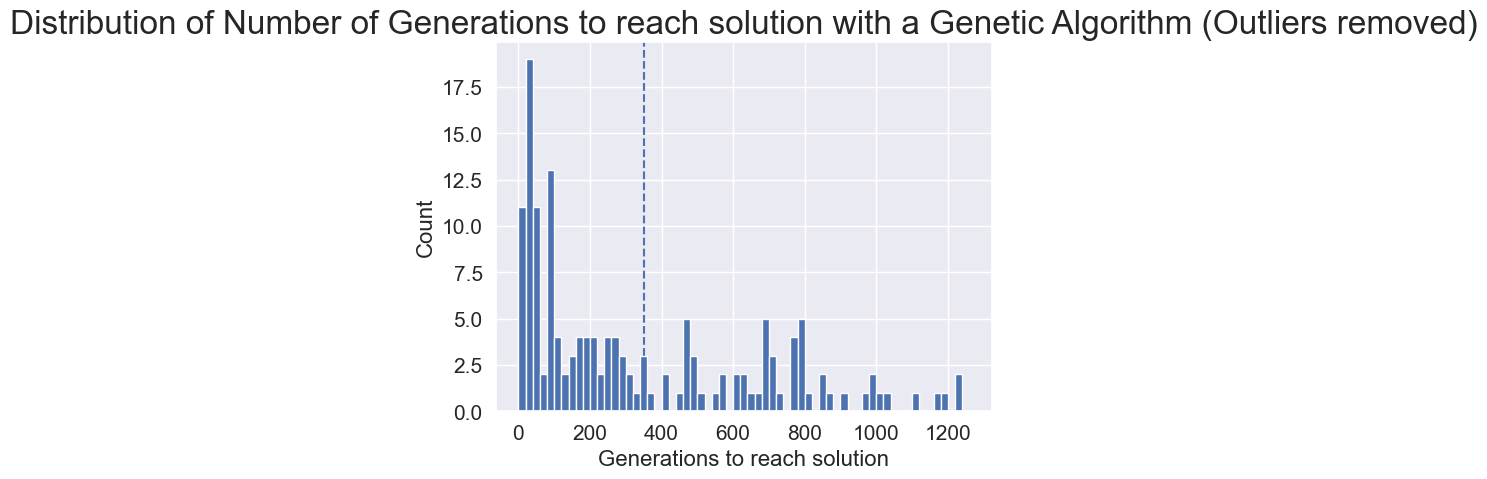

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

y = no_outliers

sns.set()
plt.hist(y, bins=np.arange(0, max(no_outliers), 20))
plt.xlabel('Generations to reach solution', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Number of Generations to reach solution with a Genetic Algorithm (Outliers removed)', fontsize=24)
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.axvline(x=np.mean(no_outliers), label='Mean', ls='--')
plt.show()

# Conclusion

#To compare your observations for both the approaches

Hill climbing and backtracking are local search methods, sensitive to initial configurations. They might get stuck in local optima or explore unnecessary paths. Genetic algorithms, being evolutionary, explore a broader solution space. The efficiency depends on parameter tuning. Observations could include solution quality, convergence speed, and sensitivity to initial conditions.

1. **Completeness:**

* Backtracking: Backtracking guarantees finding a solution if one exists. It systematically explores all possibilities, backtracking when it encounters invalid states.
* Genetic Algorithm: The genetic algorithm does not guarantee an optimal solution. It explores a subset of the solution space and may not find the global optimum.
2. **Optimality:**

* Backtracking: Backtracking ensures optimality by exhaustively searching the entire solution space, providing the optimal solution.
* Genetic Algorithm: Genetic algorithms provide good but not necessarily optimal solutions. The quality depends on the chosen parameters and the nature of the problem.
3. **Efficiency:**

* Backtracking: Backtracking can be computationally expensive for large N as it explores all possibilities. Its time complexity can be exponential.
* Genetic Algorithm: Genetic algorithms are often more efficient for large N since they explore a subset of the solution space and can handle complex problems.
4. **Scalability:**

* Backtracking: Backtracking may struggle with scalability for large N due to its exponential time complexity.
* Genetic Algorithm: Genetic algorithms can be more scalable for larger N, thanks to their parallelism and ability to handle complex solution spaces.
5. **Initialization Sensitivity:**

* Backtracking: Backtracking is not sensitive to the initial state since it systematically explores the entire solution space.
* Genetic Algorithm: The performance of a genetic algorithm can be sensitive to the initial population and parameter settings, requiring careful tuning.
6. **Parallelization:**

* Backtracking: Backtracking is inherently sequential, making it challenging to parallelize efficiently.
* Genetic Algorithm: Genetic algorithms can be parallelized, allowing for faster convergence and scalability, particularly beneficial for large-scale problems.
7. **Convergence Speed:**

* Backtracking: Backtracking can converge quickly for small N but becomes slower as N increases.
* Genetic Algorithm: The convergence speed of a genetic algorithm depends on parameters and the complexity of the problem. It can be efficient for a wide range of N.

